<a href="https://colab.research.google.com/github/arsh9806/CatsAndDogs/blob/master/Copy_of_Copy_of_CatsAndDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Dependencies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from tqdm import tqdm
import random
#https://www.kaggle.com/aditya100/cats-and-dogs
#https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb#scrollTo=-5tES8rXFjux
#https://datascience.stackexchange.com/questions/53457/error-when-checking-target-expected-dense-1-to-have-4-dimensions-but-got-array

In [ ]:
#This is base dir where dataset is present

#Testing models
test_cats = os.listdir("test_set/test_set/cats")
test_dogs = os.listdir("test_set/test_set/dogs")

train_cats = os.listdir("training_set/training_set/cats")
train_dogs = os.listdir("training_set/training_set/dogs")

**Setting Up DataSet!!**

 15%|█▍        | 587/4001 [00:01<00:06, 524.12it/s]

broken image


100%|██████████| 4001/4001 [00:07<00:00, 529.68it/s]


4000 4000
<class 'list'>


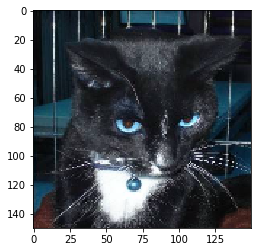

In [ ]:
#Setting Up Training Data
trainImages = []
trainLables = []
classes = [0, 1]

for cats in tqdm(train_cats):
  try:
  
    img = cv.imread("training_set/training_set/cats/" + cats)

    trainImages.append(np.array(cv.resize(img, (150, 150))))
    trainLables.append(0)
  except:
    print("broken image")
plt.imshow(trainImages[0])
print(len(trainImages), len(trainLables))
print(type(trainImages))

# New Section

In [ ]:

for dogs in tqdm(train_dogs):
  try:
  
    imzg = cv.imread("training_set/training_set/dogs/" + dogs)

    trainImages.append(np.array(cv.resize(img, (150, 150))))
    trainLables.append(1)
  except:
    print("broken image")
    
print(len(trainImages), len(trainLables))

 13%|█▎        | 534/4006 [00:01<00:06, 529.58it/s]

broken image


100%|██████████| 4006/4006 [00:07<00:00, 520.89it/s]

8005 8005


In [ ]:
#Setting up testing data

testImages = []
testLables = []
classes = [0, 1]

for cats in tqdm(test_cats):
  try:
    img = cv.imread("test_set/test_set/cats/" + cats)

    testImages.append(np.array(cv.resize(img, (150, 150))))
    testLables.append(0)
  except:
    print("broken image")
print(len(testImages), len(testLables))

 21%|██▏       | 216/1012 [00:00<00:01, 526.69it/s]

broken image


100%|██████████| 1012/1012 [00:01<00:00, 533.80it/s]

1011 1011


In [ ]:
for dogs in tqdm(test_dogs):
  try:
    img = cv.imread("test_set/test_set//dogs/" + dogs)

    testImages.append(np.array(cv.resize(img, (150, 150))))
    testLables.append(1)
  except:
    print("broken image")
print(len(testImages), len(testLables))

 21%|██        | 214/1013 [00:00<00:01, 531.87it/s]

broken image


100%|██████████| 1013/1013 [00:01<00:00, 513.82it/s]

2023 2023


In [ ]:
print(len(trainImages), len(trainLables))
print(len(testImages), len(testLables))
i = 0
print(type(trainImages))
for j in trainImages:
  trainImages[i] = j/255
  i +=1
c = list(zip(trainImages, trainLables))
random.shuffle(c)
trainImages, trainLables = zip(*c)
trainImages = np.array(trainImages)
trainLables = np.array(trainLables)



i = 0
for j in testImages:
  testImages[i] = j/255
  i += 1
c = list(zip(testImages, testLables))
random.shuffle(c)
testImages, testLables = zip(*c)
testImages = np.array(testImages)
testLables = np.array(testLables)


8005 8005
2023 2023
<class 'list'>


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(3, 3),input_shape=(150,150,3), activation=tf.nn.relu, padding='same'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid')) #model.add(keras.layers.pooling.MaxPool2D(pool_size=(2,2), strides=2, padding='valid')) # removed pooling hence working without error  
model.add(keras.layers.Conv2D(16, kernel_size=(5, 5), activation=tf.nn.relu, padding='same'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid')) # removed pooling hence now working without error
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
# keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# Set learning rate to 0.0001 and previously optimizer's learning rate was 0.001 even when we added above line in our code
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(trainImages, trainLables,batch_size=200 ,epochs=10)
# Rerun the cell again

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 16)        6416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21904)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                700960    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

#Testing
###Model was trained for only 15 epoch and it gave 70% accuracy and now testing seems pretty awesome
I ran it for many times then I made different test cases

2023/2023 [==============================] - 3s 2ms/sample - loss: 0.5800 - acc: 0.7088
0.5800088671134123 0.70884824
1
doggyy!!


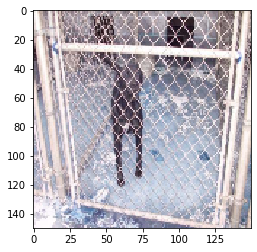

In [ ]:
loss, accuracy = model.evaluate(testImages, testLables)
print(loss, accuracy)

image_index = 152
pred = model.predict(testImages)

plt.imshow(testImages[image_index])
print(testLables[image_index])
if pred[image_index] > 0.5:
  print("doggyy!!")
else:
  print("cat")


1
doggyy!!


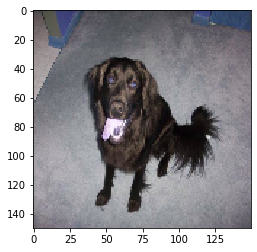

In [ ]:
image_index = 450
plt.imshow(testImages[image_index])
print(testLables[image_index])
if pred[image_index] > 0.5:
  print("doggyy!!")
else:
  print("cat")

0
[0.8286833]
doggyy!!


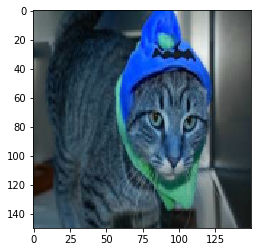

In [ ]:
image_index = 451
plt.imshow(testImages[image_index])
print(testLables[image_index])
if pred[image_index] > 0.5:
  print(pred[image_index])
  print("doggyy!!")
else:
  print("cat")

1
doggyy!!


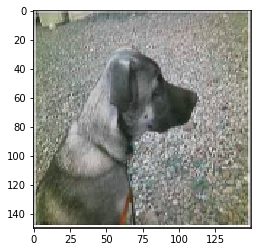

In [ ]:
image_index = 45
plt.imshow(testImages[image_index])
print(testLables[image_index])
if pred[image_index] > 0.5:
  print("doggyy!!")
else:
  print("cat")

TypeError: ignored

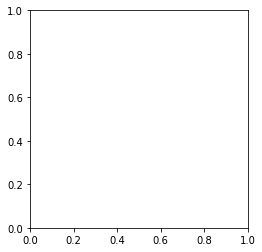

In [ ]:
RealTimeTesting = []
img = cv.imread("cat.jpg")
plt.imshow(img)
img = np.array(cv.resize(img,(150,150)))

j = 0
for i in img:
  img[j] = i/255
  j += 1
RealTimeTesting.append(img)
img = cv.imread("dog2.jpg")

img = np.array(cv.resize(img,(150,150)))

j = 0
for i in img:
  img[j] = i/255
  j += 1
RealTimeTesting.append(img)
RealTimeTesting = np.array(RealTimeTesting)
predictions = model.predict(RealTimeTesting)
print(predictions)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import tree
data = [[100,100],
       [200,150],
       [300,200],
       [400, 500],
       [1500, 900],
       [1200, 850],
        [1250, 875],
        [1500, 1000]
       ]
lables = [0, 0, 0, 0, 1 ,1, 1, 1]
model = tree.DecisionTreeClassifier()
model.fit(data, lables)
prediction = model.predict([[500,150]])
print(prediction)

[0]


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dog2.jpg to dog2.jpg



from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip
!unzip training_set.zip
!unzip test_set.zip

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

 97% 212M/218M [00:02<00:00, 69.4MB/s]
100% 218M/218M [00:02<00:00, 103MB/s] 


In [ ]:
!unzip cat-and-dog.zip


Archive:  cat-and-dog.zip
replace test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_set/test_set/cats/_DS_Store  
replace test_set/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace test_set/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace test_set/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace test_set/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test_set/test_set/cats/cat.4001.jpg  
  inflating: test_set/test_set/cats/cat.4002.jpg  
  inflating: test_set/test_set/cats/cat.4003.jpg  
  inflating: test_set/test_set/cats/cat.4004.jpg  
  inflating: test_set/test_set/cats/cat.4005.jpg  
  inflating: test_set/test_set/cats/cat.4006.jpg  
  inflating: test_set/test_set/cats/cat.4007.jpg  
  inflating: test_set/test_set/cats/cat.4008.jpg  
  inflati

In [ ]:
!unzip training_set.zip


unzip:  cannot find or open training_set.zip, training_set.zip.zip or training_set.zip.ZIP.


In [ ]:
!unzip test_set.zip

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json
